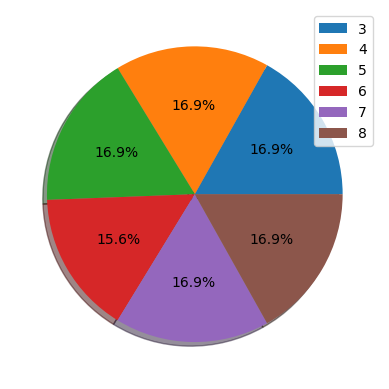

In [1]:
# Trying minmax normalization into StandardDevNormalization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as skd
import sklearn.model_selection as skm
import sklearn.datasets
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Importing the data into a data variable 
#f = open('winequality-red.csv')
#headers = f.readline().strip().split(';')
#data = np.loadtxt(f, delimiter=';')

# Importing the data into a data variable 
df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
df = df.drop_duplicates()

# Splitting dataframe by quality class
df_1 = df[df.quality==1]
df_2 = df[df.quality==2]
df_3 = df[df.quality==3]
df_4 = df[df.quality==4]
df_5 = df[df.quality==5]
df_6 = df[df.quality==6]
df_7 = df[df.quality==7]
df_8 = df[df.quality==8]
df_9 = df[df.quality==9]
df_10 = df[df.quality==10]


# Upsampling classes 3,4,7,8 to the number of instances under class 5

df_3_upsampled = resample(df_3, replace=True,     # sample with replacement
                      n_samples=np.shape(df_5)[0],    # to match class 5
                      random_state=42) 

df_4_upsampled = resample(df_4, replace=True,     # sample with replacement
                      n_samples=np.shape(df_5)[0],    # to match class 5
                      random_state=42) 
df_7_upsampled = resample(df_7, replace=True,     # sample with replacement
                      n_samples=np.shape(df_5)[0],    # to match class 5
                      random_state=42) 
df_8_upsampled = resample(df_8, replace=True,     # sample with replacement
                      n_samples=np.shape(df_5)[0],    # to match class 5
                      random_state=42) 


# Putting together all split dataframes together to include upsampled classes
df_upsampled = pd.concat([df_5,df_6,df_3_upsampled,df_4_upsampled,df_7_upsampled,df_8_upsampled])


# Obtaining the feature matrix into the variable X. Removing residual sugar
X = df_upsampled.drop(['residual sugar','quality'], axis=1)

# Obtaining output vector
y = df_upsampled.quality



# Splitting the data set to training and test sets
# with test_size = 20%
X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.2, random_state=42,stratify=y)


# Standardizing each feature to have mean = 0 and variance = 1
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Obtaining unique classes and counts for each instance under each class
unique_values, counts = np.unique(y, return_counts=True)

# Plotting the distribution of class instances as a pie chart
plt.pie(counts,shadow=True,autopct='%.1f%%')
plt.legend(unique_values)
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV

hidden_node_test = range(265,285,1)
hidden_layer_test = range(1,3,1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(hidden_node,) * hidden_layer \
                           for hidden_node in hidden_node_test \
                           for hidden_layer in hidden_layer_test],
    'activation': ['relu','tanh','logistic'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.1]
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform a grid search using cross-validation
grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

Best parameters found: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (275,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Best accuracy: 0.8486809271540853
Test set accuracy: 0.8464912280701754


In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       1.00      0.98      0.99       118
           4       1.00      0.88      0.94       130
           5       0.57      0.67      0.62        99
           6       0.54      0.61      0.57        95
           7       0.94      0.89      0.91       123
           8       1.00      0.97      0.98       119

    accuracy                           0.85       684
   macro avg       0.84      0.83      0.84       684
weighted avg       0.86      0.85      0.85       684

